In [1]:
#import the required libraries
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import urllib.request
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from math import sqrt
%matplotlib inline

In [2]:
#helper method to create regression model
def create_model(degree, x_train, x_test ):
  polynomial_features = PolynomialFeatures(degree = degree)
  xp_train = polynomial_features.fit_transform(x_train)
  xp_test = polynomial_features.fit_transform(x_test)
  model = sm.OLS(y_train,xp_train).fit()
  return xp_train,xp_test, model

In [3]:
#read the CSV File from the local location
df = pd.read_csv('D:\\Storage\\Sch\\KE5108\\CA3\\oil.price.dat.txt')
print(df.count())
#set the index from 0
df.index = pd.RangeIndex(start=1, stop=242, step=1)

oil.price    241
dtype: int64


In [4]:
#Prepare the dataset for train and test for 12 months
#Split the data set
train_12 = df.iloc[:229,:]
test_12 = df.iloc[229:,:]

x_train_12 = np.array(train_12.index)
x_train_12 = x_train_12.reshape(-1,1)
y_train_12 = np.array(train_12['oil.price'])
y_train_12 = y_train_12.reshape(-1,1)

x_test_12 = np.array(test_12.index)
x_test_12 = x_test_12.reshape(-1,1)
y_test_12 = np.array(test_12['oil.price'])
y_test_12 = y_test_12.reshape(-1,1)

In [5]:
#Prepare the dataset for train and test for 6 months
#Split the data set
train_6 = df.iloc[:235,:]
test_6 = df.iloc[235:,:]

x_train_6 = np.array(train_6.index)
x_train_6 = x_train_6.reshape(-1,1)
y_train_6 = np.array(train_6['oil.price'])
y_train_6 = y_train_6.reshape(-1,1)

x_test_6 = np.array(test_6.index)
x_test_6 = x_test_6.reshape(-1,1)
y_test_6 = np.array(test_6['oil.price'])
y_test_6 = y_test_6.reshape(-1,1)

In [6]:
#here we do the experiment of degree to find best model
result = {}
result_aic = {}
result_bic = {}

x_train = x_train_6 #change to 12 for 12 month training
x_test = x_test_6

y_train = y_train_6
y_test = y_test_6

for i in range(10):
    xp_train,xp_test, model = create_model(i, x_train, x_test)
    ypred = model.predict(xp_train)
    rmse = sqrt(mean_squared_error(y_train, ypred))
    result.update({i:rmse})
    result_aic.update({i:model.aic})
    result_bic.update({i:model.bic})

In [7]:
result

{0: 8.654737496512796,
 1: 6.562058017002936,
 2: 5.292490769803882,
 3: 4.0760505089249275,
 4: 4.035437345117475,
 5: 3.982419986472446,
 6: 3.7424551176395897,
 7: 5.346290296048528,
 8: 6.482772836563856,
 9: 7.745552483411113}

In [8]:
result_aic

{0: 1683.2113340898588,
 1: 1555.1141202602148,
 2: 1456.0569312113569,
 3: 1335.311508929554,
 4: 1332.6050119610545,
 5: 1328.3892561261214,
 6: 1301.1797775799755,
 7: 1466.8104819653277,
 8: 1557.400823692379,
 9: 1639.0469492047391}

In [9]:
result_bic

{0: 1686.670919604003,
 1: 1562.033291288503,
 2: 1466.4356877537894,
 3: 1349.1498509861308,
 4: 1349.9029395317752,
 5: 1349.1467692109863,
 6: 1325.3968761789847,
 7: 1487.5679950501926,
 8: 1578.158336777244,
 9: 1656.3448767754599}

In [10]:
#to run prediction on the model choosen
x_train = x_train_6
x_test = x_test_6

y_train = y_train_6
y_test = y_test_6

xp_train,xp_test, model = create_model(6, x_train, x_test)
ypred_train = model.predict(xp_train)
rmse = sqrt(mean_squared_error(y_train, ypred_train))
rmse

3.7424551176395897

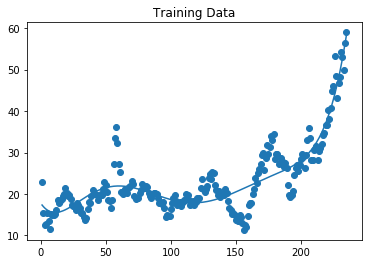

In [11]:
plt.title("Training Data")
plt.scatter(x_train,y_train)
plt.plot(x_train,ypred_train)
plt.show()

In [12]:
#to run prediction on the model choosen
x_train = x_train_12
x_test = x_test_12

y_train = y_train_12
y_test = y_test_12

xp_train,xp_test, model = create_model(6, x_train, x_test)
ypred_test = model.predict(xp_test)
rmse = sqrt(mean_squared_error(y_test, ypred_test))
rmse

5.732708994871272

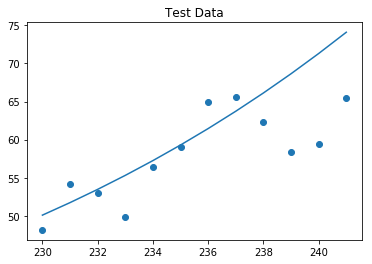

In [13]:
plt.title("Test Data")
plt.scatter(x_test,y_test)
plt.plot(x_test,ypred_test)
plt.show()